In [552]:
import folium
import pandas as pd
import numpy as np
import json

In [553]:
df = pd.read_csv("../data/경기도 파주시_하수처리장_20231114.csv",
            encoding="cp949")

hasu = df[["행정동","우천시처리용량(톤)"]].groupby("행정동").sum()
hasu

,우천시처리용량(톤)
행정동,
광탄면,2000
금촌2동,44000
문산읍,17000
법원읍,3000
운정1동,60000
적성면,2700
탄현면,22800
파주읍,6200
파평면,1300


In [554]:
with open("../data/paju_hang.geojson") as f:
    paju = json.load(f)

paju["features"][0]

{'type': 'Feature',
 'properties': {'adm_nm': '경기도 파주시 문산읍',
  'adm_cd': '3120011',
  'adm_cd2': '4148025000',
  'sgg': '41480',
  'sido': '41',
  'sidonm': '경기도',
  'temp': '파주시 문산읍',
  'sggnm': '파주시',
  'adm_cd8': '31200110'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[126.79865628190475, 37.89281705210446],
     [126.79877208211333, 37.89225950926274],
     [126.79930128700393, 37.889711442051016],
     [126.79954097724438, 37.888866340678376],
     [126.79982412228576, 37.88786803441892],
     [126.79998728046144, 37.88730119171098],
     [126.80000089526519, 37.88682887920102],
     [126.80000207746967, 37.88678748994939],
     [126.7998528085614, 37.886114068096646],
     [126.79907739597796, 37.88573685101113],
     [126.79771691130098, 37.88507500021391],
     [126.79693274882916, 37.88419944715609],
     [126.79688451683283, 37.88387697460507],
     [126.79682582902322, 37.883484535430604],
     [126.79700138826107, 37.882810742247216],
     [126.79756929262251

In [555]:
names = []
for item in paju["features"]:
    names.append(item["properties"]["temp"])

for j_name in names:
    for h_name in hasu.index:
        if h_name in j_name:
            hasu.loc[h_name,"geo_name"] = j_name

hasu.index = hasu["geo_name"]

In [556]:
map = folium.Map(location=[37.8544244,126.8115232],
                 zoom_start=10)
folium.Choropleth(geo_data=paju,
                  data=hasu["우천시처리용량(톤)"],
                  fill_color = "PuOr",
                  key_on="feature.properties.temp",
                  legend_name="우천시처리용량(톤)").add_to(map)
map

In [557]:
# @ 18 getdummies 원핫 인코딩 하기

test_df = pd.DataFrame(data=["a","b","a","c"],
                       columns=["test"])
pd.get_dummies(test_df,drop_first=True)

,test_b,test_c
0,0,0
1,1,0
2,0,0
3,0,1


In [558]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline 

# 그래프의 폰트 출력을 선명하게 (png2x ,svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")

# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("tableau-colorblind10")

# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

# 가능한 스타일 확인해보기
# mpl.style.available

# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

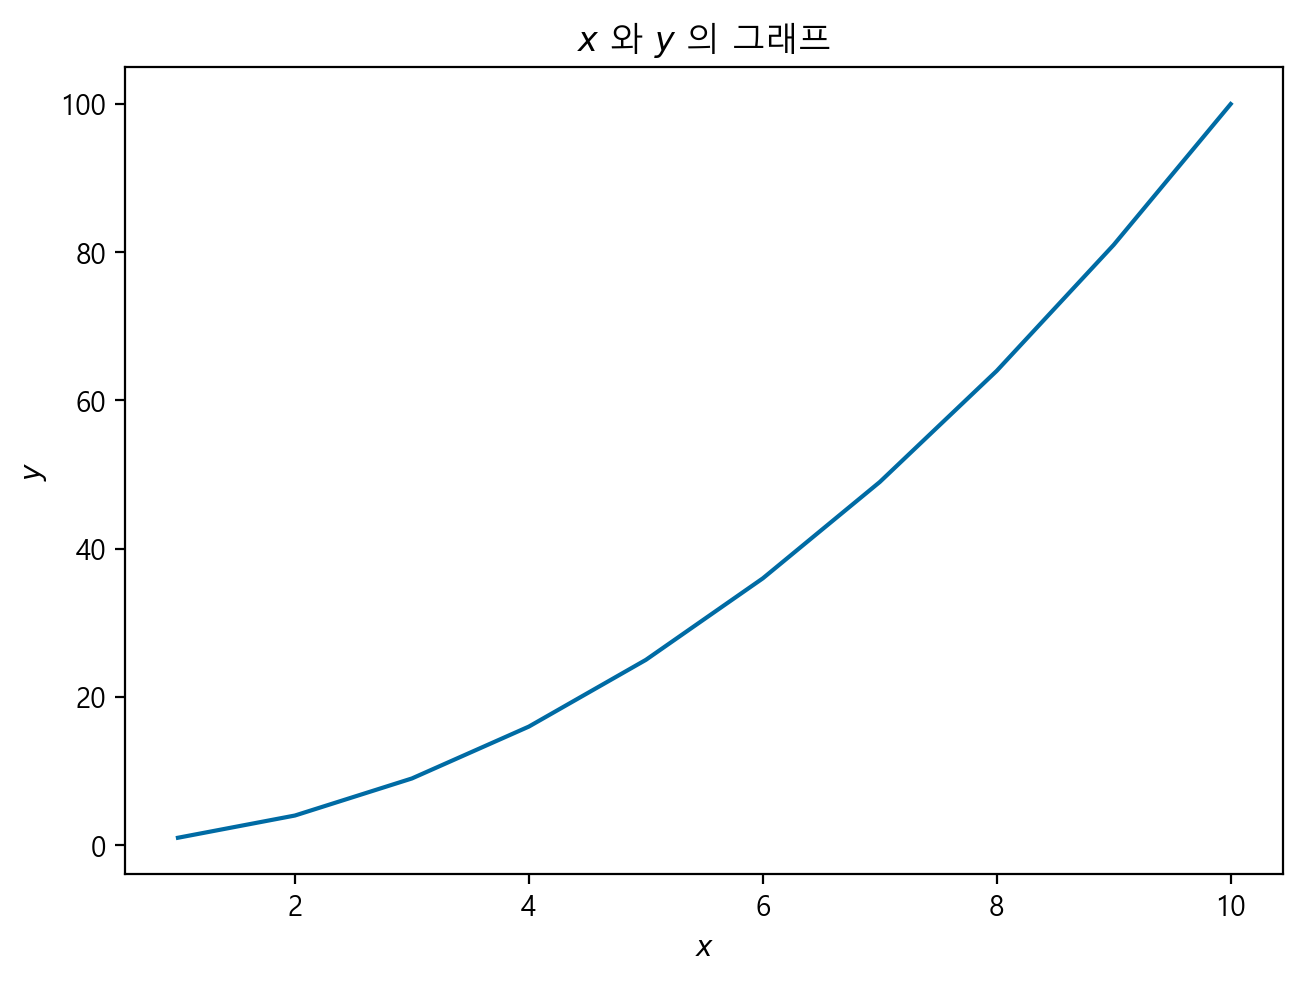

In [559]:
# 선그래프
fig, ax = plt.subplots()

sns.lineplot(x=np.linspace(1,10,10),
             y=np.arange(1,11)**2,
             ax=ax);
ax.set(xlabel=f"$x$",
       ylabel=f"$y$",
       title=f"$x$ 와 $y$ 의 그래프");

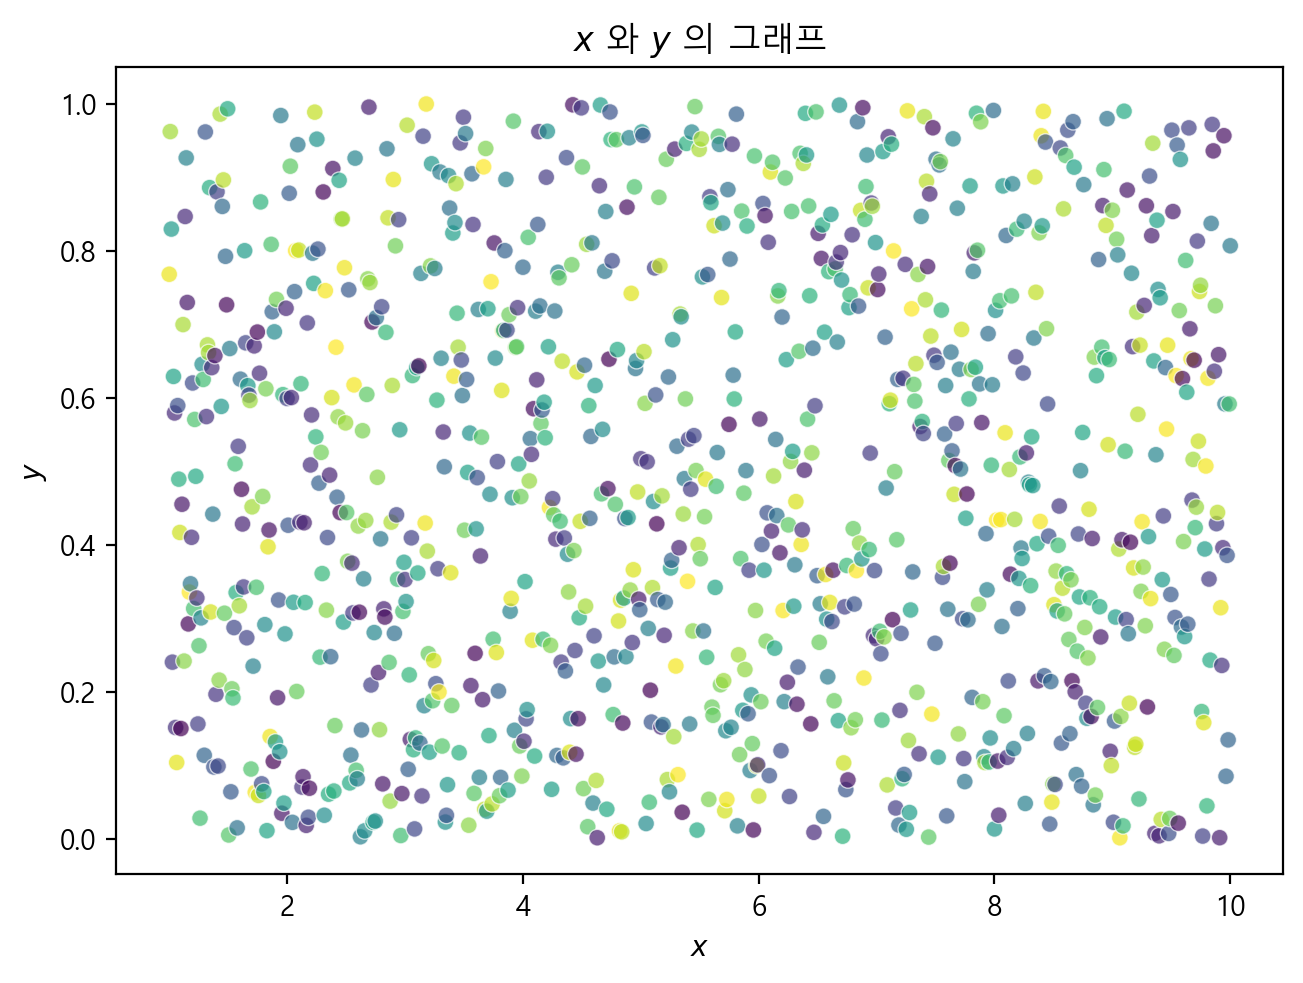

In [560]:
# 스케터 그래프
fig, ax = plt.subplots()

sc = sns.scatterplot(x=np.linspace(1,10,1000),
                       y=np.random.random(1000),
                       c=np.random.random(1000),
                       cmap = "viridis",
                       alpha=0.7,
                       ax=ax);

ax.set(xlabel=f"$x$",
       ylabel=f"$y$",
       title=f"$x$ 와 $y$ 의 그래프");

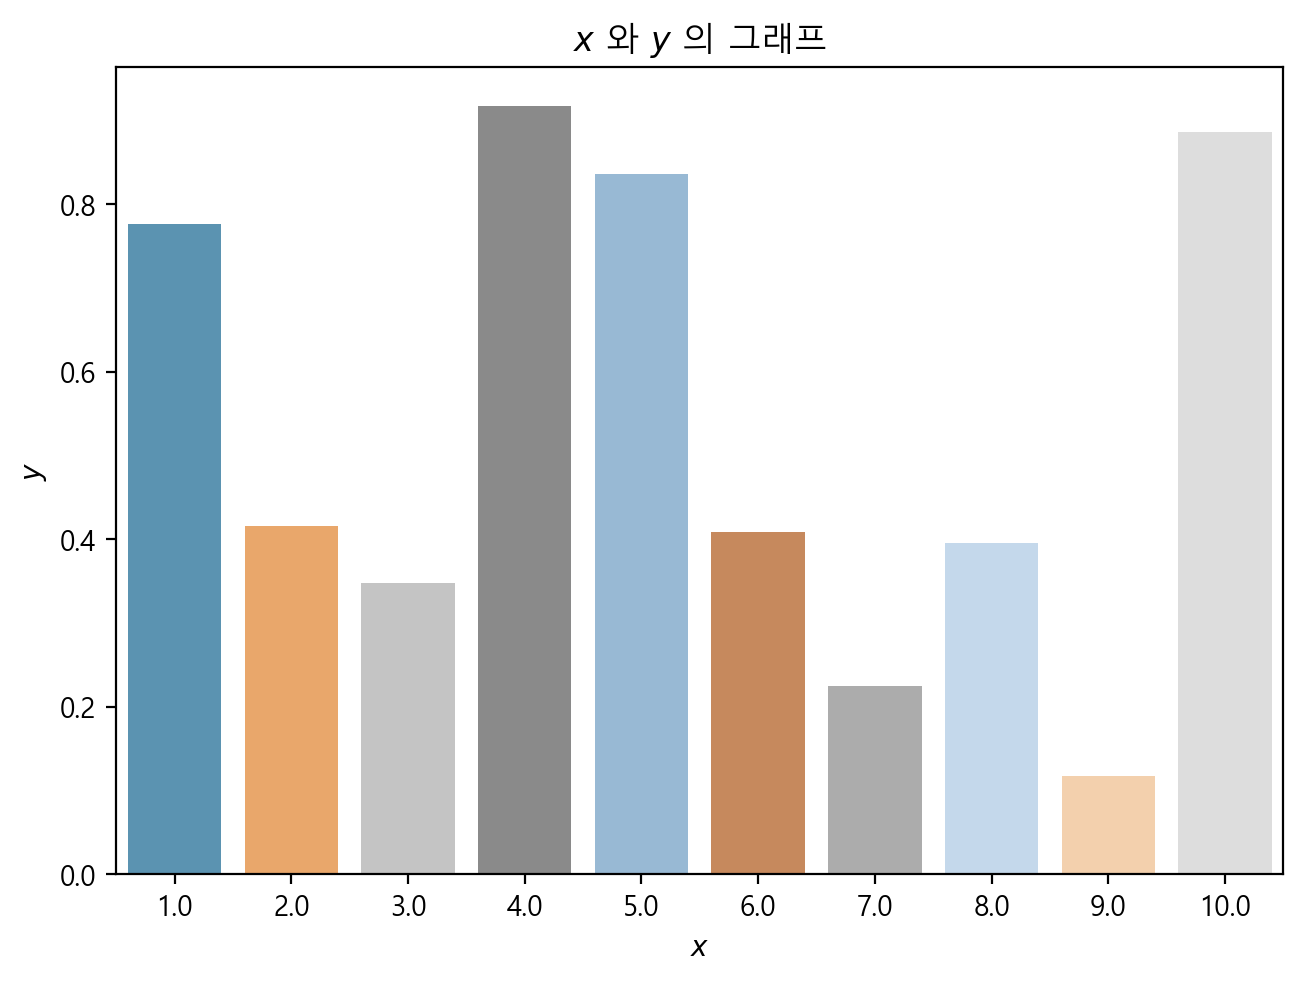

In [561]:
# bar 그래프
fig, ax = plt.subplots()

sc = sns.barplot(x=np.linspace(1,10,10),
                       y=np.random.random(10),
                       alpha=0.7,
                       ax=ax);

ax.set(xlabel=f"$x$",
       ylabel=f"$y$",
       title=f"$x$ 와 $y$ 의 그래프");

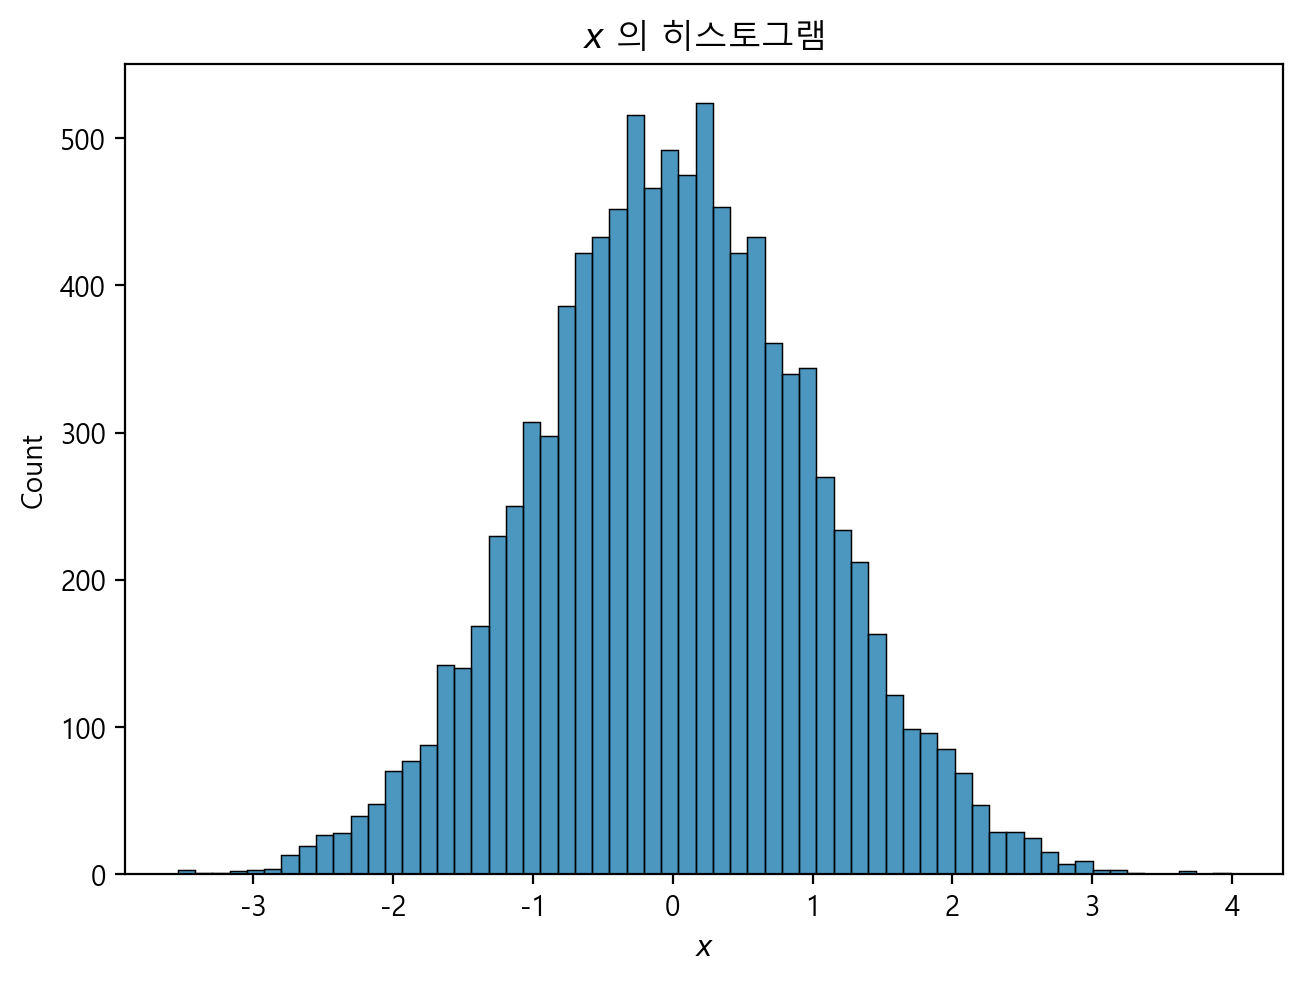

In [562]:
# hist 그래프
fig, ax = plt.subplots()

sc = sns.histplot(x=np.random.randn(10000),
                   alpha=0.7,
                   ax=ax);

ax.set(xlabel=f"$x$",
       title=f"$x$ 의 히스토그램");

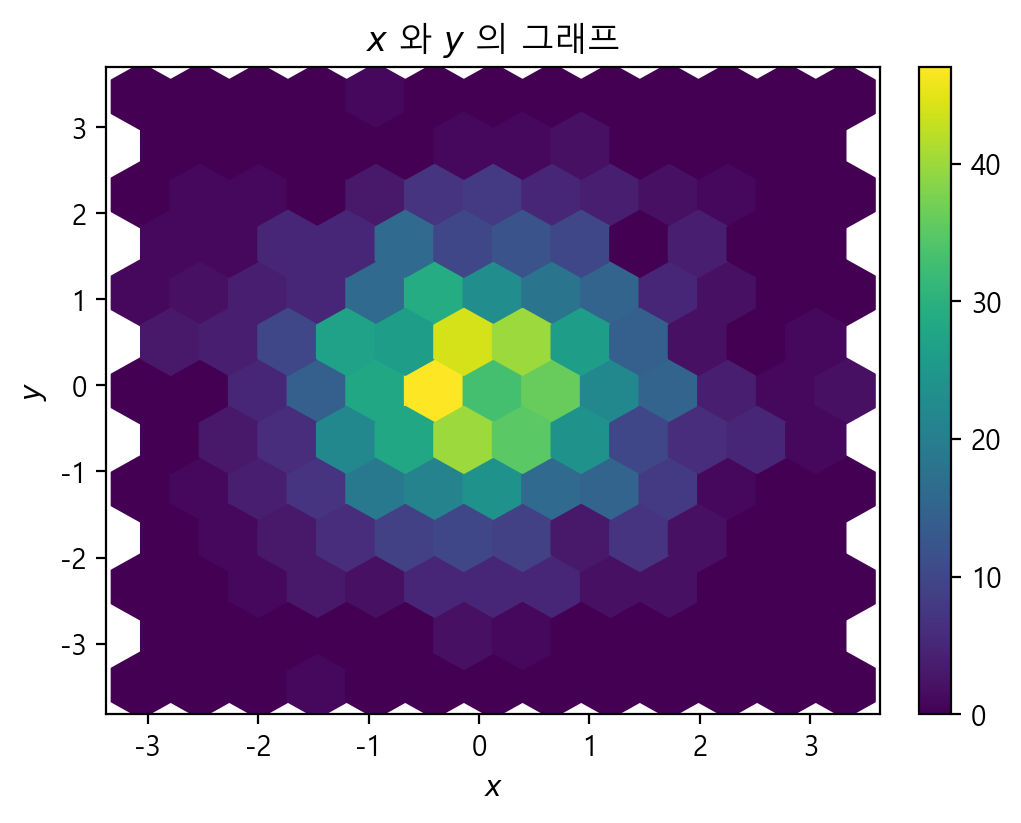

In [563]:
# bar 그래프
fig, ax = plt.subplots(figsize=(5,4))

hb = ax.hexbin(x=np.random.randn(1000),
               y=np.random.randn(1000),
               gridsize=12,);

fig.colorbar(hb,ax=ax)

ax.set(xlabel=f"$x$",
       ylabel=f"$y$",
       title=f"$x$ 와 $y$ 의 그래프");


In [564]:
genders_1 = pd.Series(data=["male"] * 50,
                       name="gender",
                       dtype="category")

datas_1 = pd.DataFrame({
    "height": np.random.randint(170,200,50),
    "weight": np.random.randint(70,100,50),
    "school": np.random.randint(0,2,50)
})

genders_2 = pd.Series(data=["female"] * 50,
                       name="gender",
                       dtype="category")

datas_2 = pd.DataFrame({
    "height": np.random.randint(140,170,50),
    "weight": np.random.randint(40,60,50),
    "school": np.random.randint(0,2,50)
})

df_1 = pd.concat([genders_1,datas_1],axis=1)
df_2 = pd.concat([genders_2,datas_2],axis=1)
df = pd.concat([df_1,df_2],axis=0)

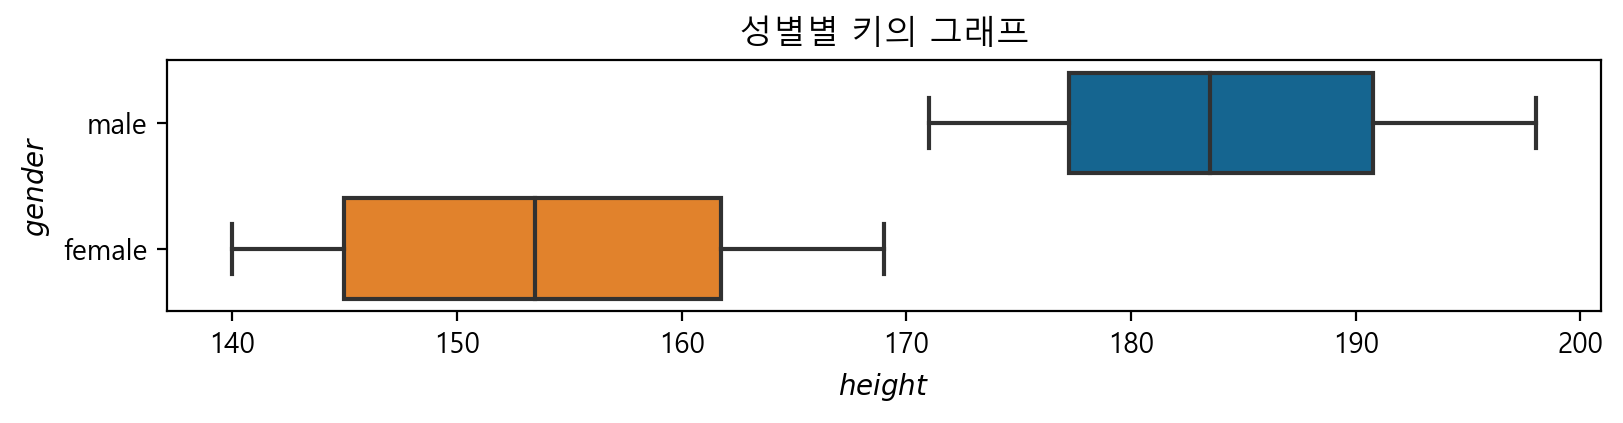

In [565]:
# box plot

fig, ax = plt.subplots(figsize=(8,2))

sns.boxplot(data=df,
              x="height",
              y="gender",
              ax=ax)

ax.set(xlabel=f"$height$",
       ylabel=f"$gender$",
       title=f"성별별 키의 그래프");

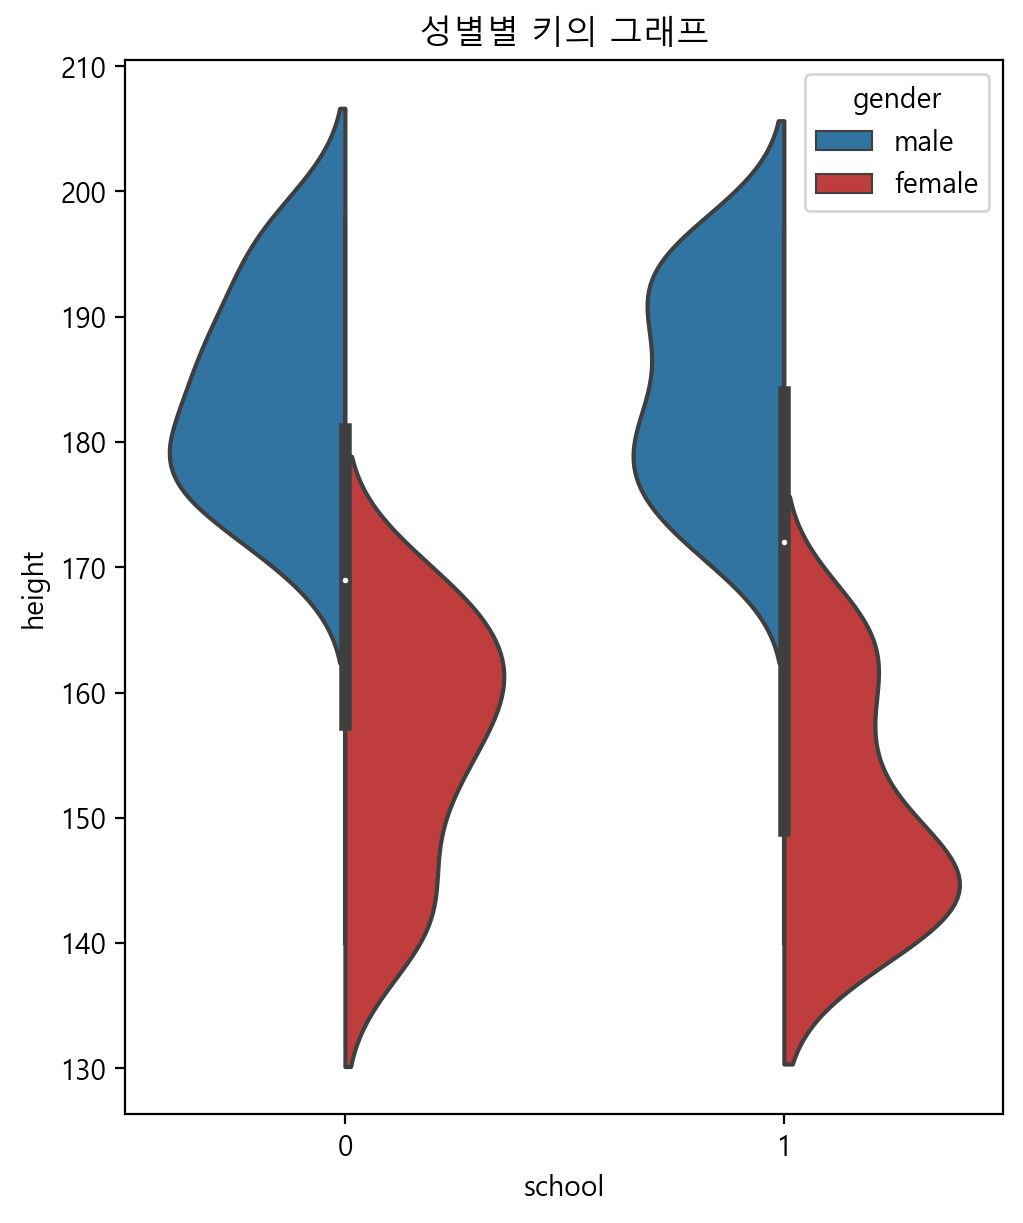

In [566]:
#  violin plot

fig, ax = plt.subplots(figsize=(5,6))

sns.violinplot(data=df,
              x="school",
              y="height",
              hue="gender",
              split=True,
              palette={"male":"tab:blue", "female":"tab:red"},
              ax=ax)

ax.set(xlabel="school",
       ylabel="height",
       title=f"성별별 키의 그래프");

# corr

In [569]:
genders_1 = pd.Series(data=["male"] * 50,
                       name="gender",
                       dtype="category")

datas_1 = pd.DataFrame({
    "height": np.random.randint(170,200,50),
    "weight": np.random.randint(70,100,50),
    "school": np.random.randint(0,2,50)
})

genders_2 = pd.Series(data=["female"] * 50,
                       name="gender",
                       dtype="category")

datas_2 = pd.DataFrame({
    "height": np.random.randint(140,170,50),
    "weight": np.random.randint(40,60,50),
    "school": np.random.randint(0,2,50)
})

df_1 = pd.concat([genders_1,datas_1],axis=1)
df_2 = pd.concat([genders_2,datas_2],axis=1)
df = pd.concat([df_1,df_2],axis=0)

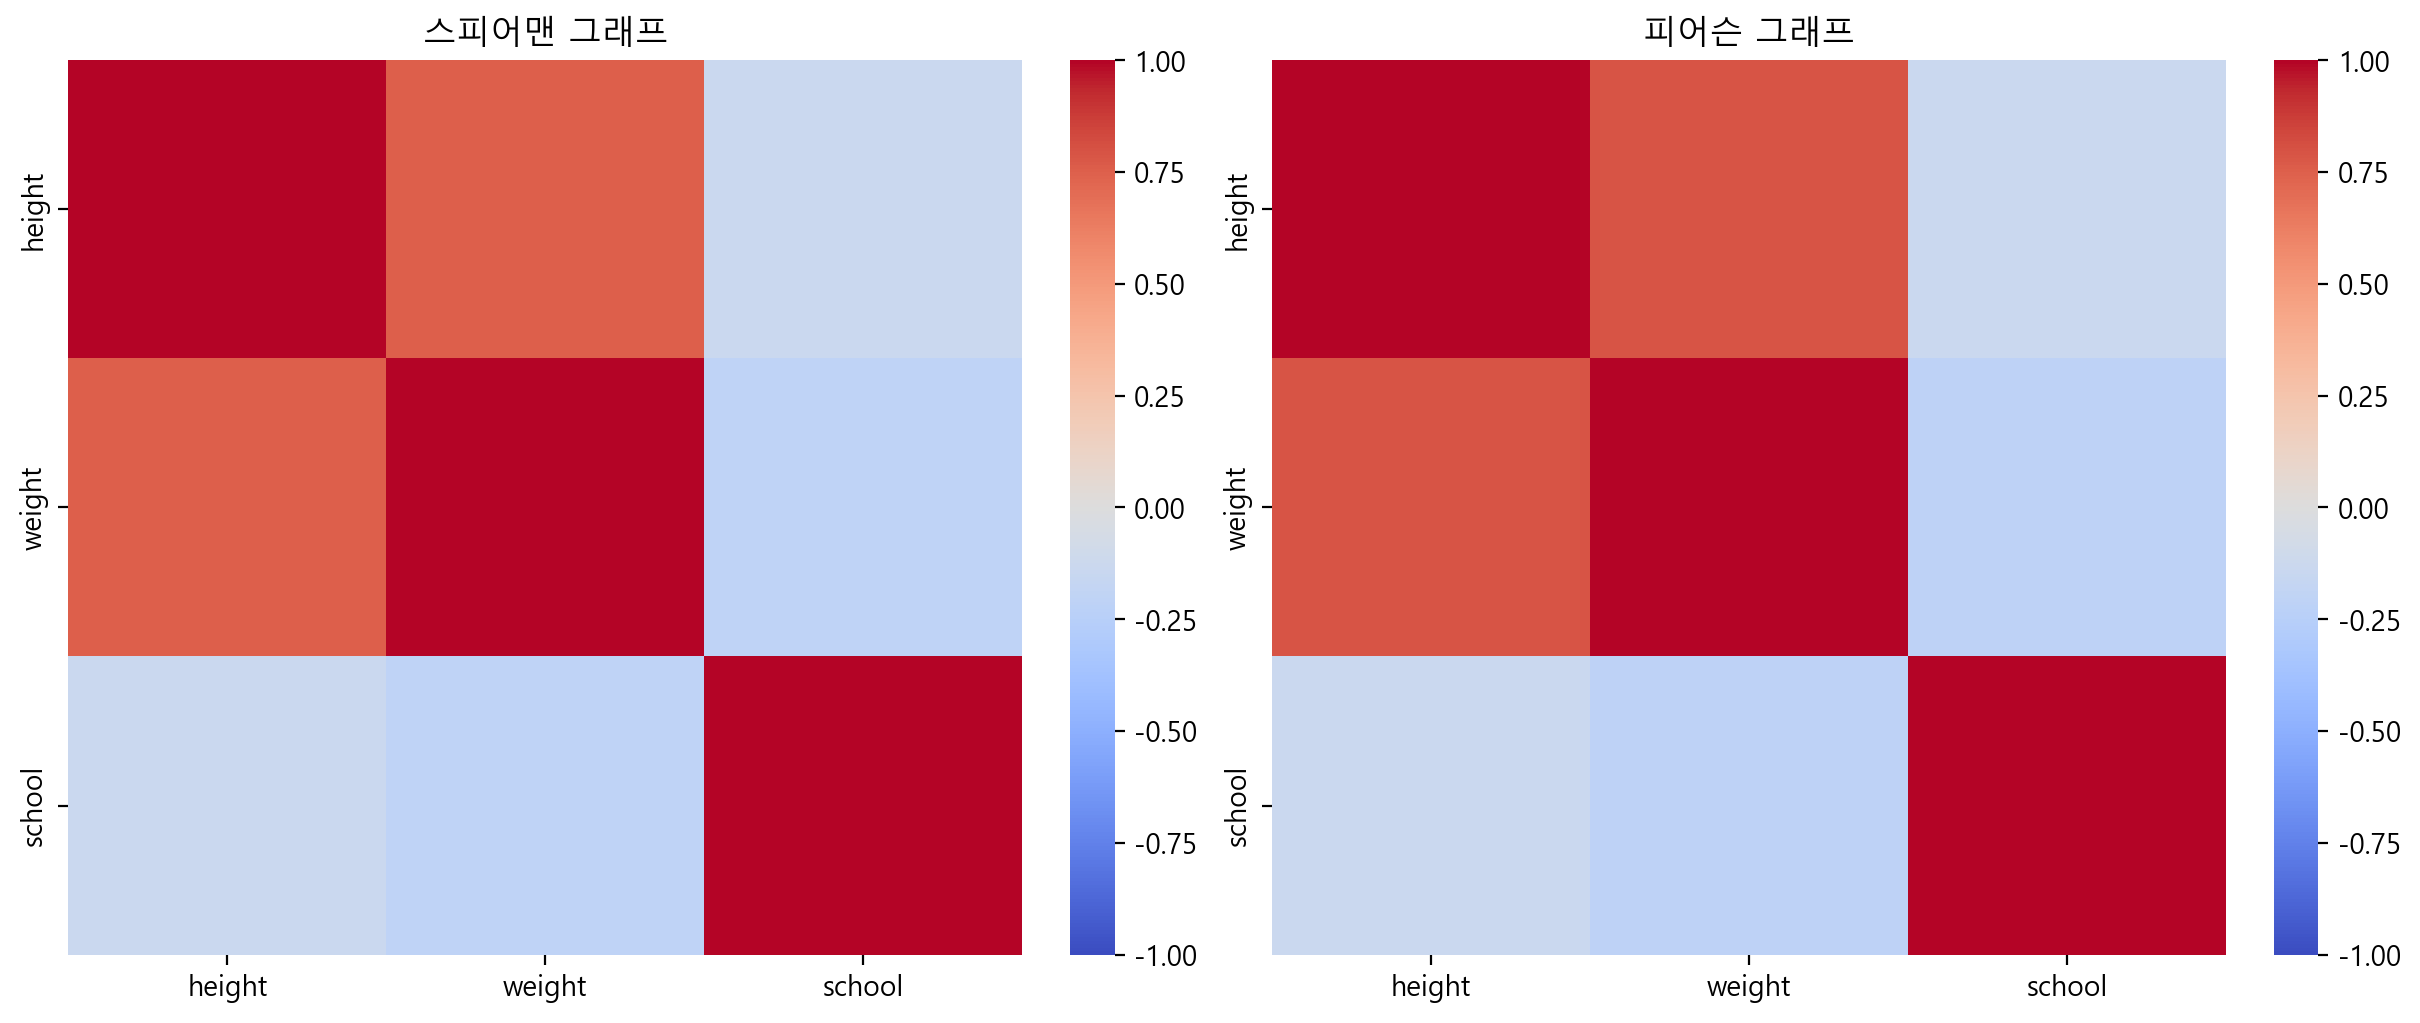

In [605]:
# 스피어맨 : 이상치에 덜민감
# 피어슨 : 이상치에 민감
spreaman = df[["height","weight","school"]].corr('spearman')
pearson = df[["height","weight","school"]].corr('pearson')

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.heatmap(data=spreaman,
            vmax=1,
            vmin=-1,
            cmap="coolwarm",
            ax=ax[0])
sns.heatmap(data=pearson,
            vmax=1,
            vmin=-1,
            cmap="coolwarm",
            ax=ax[1])

ax[0].set(title=f"스피어맨 그래프")
ax[1].set(title=f"피어슨 그래프");

In [616]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # 차원 축소

# 1. df 원핫 인코딩
df_onehot = pd.get_dummies(df, drop_first=True)

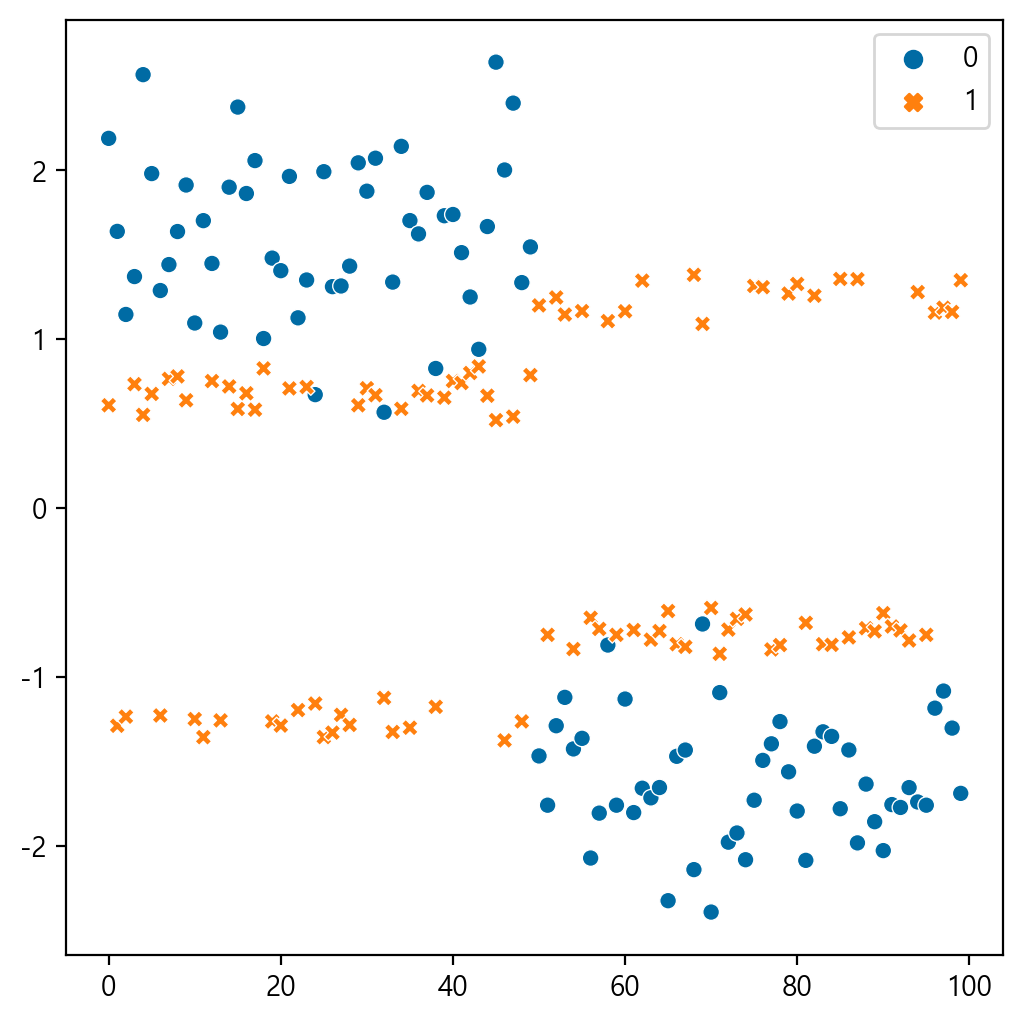

In [628]:
# 2. 스케일링 하기 
scaler_model = StandardScaler()
df_scaled = scaler_model.fit_transform(df_onehot)

# 3. 주성분 분석 하기 (PCA 차원축소)

df_pca = PCA(n_components=2).fit_transform(df_scaled)


fig, ax = plt.subplots(figsize=(5,5))

sns.scatterplot(data=df_pca,
            ax=ax);